In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

This is the method we followed to clean up the images.
1. We took the *phase* image 
2. Converted it to grayscale
3. Increased the contrast.


In [40]:
# PREPROCESSING 

# Read the image
image = cv2.imread('D:\\Pranav\\Pictures\\Saved Pictures\\1_amplitude.jpg')
image2 = cv2.imread(r"D:\Pranav\Machine-Learning\gui\saved_images\average_topo_phase.jpg")

# Convert the image to grayscale
gray_amp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_phase = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
plt.set_cmap("gray")
# histogram equalisation (increases contrast)
#equalized_image_phase = cv2.equalizeHist(gray_phase)

#CLAHE (Contrast Limited Adaptive Histogram Equalization) is another way to increase contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_image_phase = clahe.apply(gray_phase)

<Figure size 640x480 with 0 Axes>

4. First approach
* Remove the line noise 
* Apply thresholding 

5. Second approach
* Use K means clustering on contrasted phase image to extract useful items.

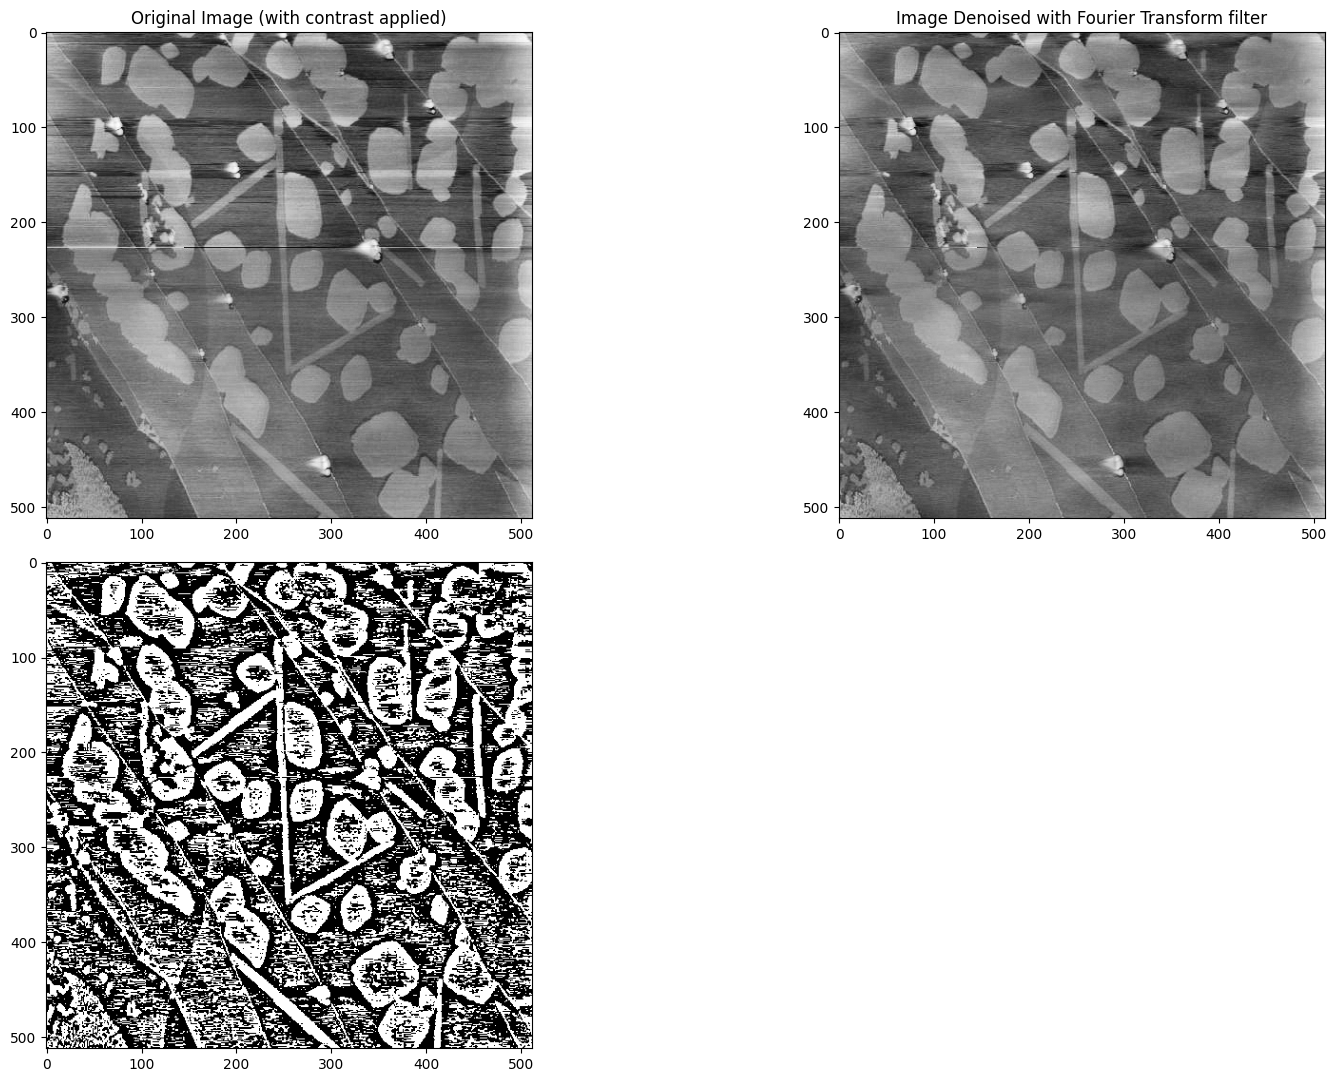

In [41]:
# reduce line noise
plt.figure(figsize=(16,16))

# Fourier transform
def f_trans(image):
    f = np.fft.fft2(image)

    #shift image to the center
    fshift = np.fft.fftshift(f)

    #display the log of the magnitude of the fourier transform
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    rows, cols = image.shape
    crow,ccol = rows//2 , cols//2
    fshift[0:crow-10, ccol-5:ccol+5] = 0
    fshift[crow+10:, ccol-5:ccol+5] = 0

    # get the spatial domain back
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)
    return img_back


plt.subplot(3,2,3)
plt.title("Original Image (with contrast applied)")
plt.imshow(equalized_image_phase)
img_back = f_trans(equalized_image_phase)
plt.subplot(3,2,4)
plt.imshow(img_back)
plt.title("Image Denoised with Fourier Transform filter")
plt.imsave('./image.jpg', img_back)
denoise = cv2.imread('./image.jpg')

#Creating a mask to apply selective filtering to the original filter
mask2 = np.zeros_like(denoise)
denoise = cv2.cvtColor(denoise, cv2.COLOR_RGB2GRAY)

# Threshold the image to create a binary mask to apply selective filtering to.
bw = cv2.adaptiveThreshold(denoise, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                cv2.THRESH_BINARY, 35, 0)
plt.subplot(3,2,5)
plt.imshow(bw)

plt.tight_layout()
plt.show()

error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


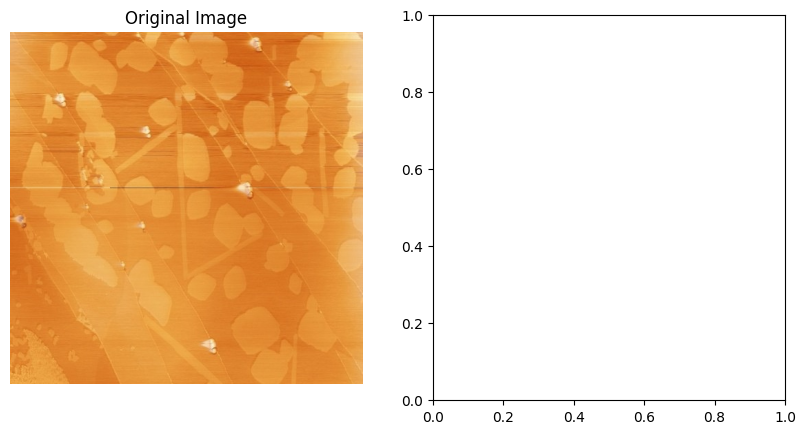

In [45]:
b, g, r = cv2.split(image2)

# Apply histogram equalization to each color channel
b_eq = f_trans(clahe.apply(cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)))
g_eq = f_trans(clahe.apply(cv2.cvtColor(g, cv2.COLOR_BGR2GRAY)))
r_eq = f_trans(clahe.apply(cv2.cvtColor(r, cv2.COLOR_BGR2GRAY)))

# Merge the equalized color channels
equalized_image = cv2.merge((b_eq, g_eq, r_eq))

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.show()